In [3]:
# 디지털 병리 분야에서 사용되는 초고해상도 전체 슬라이드 이미지 WSI를 읽고 처리하기 위한 오픈소스 라이브러리
# 수십 기가바이트의 거대한 병리 영상 파일을 메모리 전체에 올리지 않고, 필요한 부분만 고속으로 처리할 수 있게함.
import os
from pathlib import Path
from openslide import OpenSlide
import matplotlib.pyplot as plt
import numpy as np

In [10]:
BASE_PATH = Path('../medical_image/pathology_img')
path_img_path = list(BASE_PATH.glob('*/*'))[0]
print(f'이미지 파일 경로:{path_img_path}')

이미지 파일 경로:..\medical_image\pathology_img\bdc28684-e4ce-4fdb-9833-632cb9bfb5aa\TCGA-EJ-7782-01A-01-TS1.f0921308-6e5d-4392-8023-9882d915be80.svs


In [12]:
#openslide 객체 생성
#이 객체를 통해 거대한 병리학 이미지WSI의 메티데이터에 접근하고, 필요한 영역(region)을 효율적으로 읽어옴
slide = OpenSlide(str(path_img_path))
slide

OpenSlide('..\\medical_image\\pathology_img\\bdc28684-e4ce-4fdb-9833-632cb9bfb5aa\\TCGA-EJ-7782-01A-01-TS1.f0921308-6e5d-4392-8023-9882d915be80.svs')

In [14]:
def show_path_info(slide):
    #객체의 주요 정보를 출력
    #(넓이, 높이) 튜플, 이미지의 전체 크기를 나타냅니다. (가장 높은 해상도인 레벨0 기준)
    print("patient's dimensions...", slide.dimensions)
    #level_count 이미지에 포함된 해상도 레벨(피라미드 구조)의 총 개수
    #WSI는 효율적인 줌인/줌아웃을 위에 여러 단계의 축소된 이미지를 내장.
    print("patient's z level....",slide.level_count)
    #level_dimension : 각 레벨별 이미지의 크기(넓이, 높이)를 담고 있는 리스트
    #레벨0이 원본 해상도, 레벨이 커질수록 이미지는 축소됨
    print("patient's z dimensions:", slide.level_dimensions)
show_path_info(slide)

patient's dimensions... (69065, 68679)
patient's z level.... 4
patient's z dimensions: ((69065, 68679), (17266, 17169), (4316, 4292), (2158, 2146))


In [15]:
slide.properties

<_PropertyMap {'aperio.AppMag': '40', 'aperio.DSR ID': 'ap1546-dsr', 'aperio.Date': '11/15/11', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': '31227', 'aperio.Focus Offset': '0.000000', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '31227', 'aperio.Left': '42.968620', 'aperio.LineAreaXOffset': '0.000000', 'aperio.LineAreaYOffset': '0.000000', 'aperio.LineCameraSkew': '-0.000389', 'aperio.MPP': '0.2520', 'aperio.OriginalHeight': '68779', 'aperio.OriginalWidth': '72000', 'aperio.ScanScope ID': 'SS1302', 'aperio.StripeWidth': '1000', 'aperio.Time': '16:37:56', 'aperio.Time Zone': 'GMT-07:00', 'aperio.Top': '21.434242', 'aperio.User': '5ceb2363-10c8-43d9-b927-d862d87fb522', 'openslide.associated.thumbnail.height': '768', 'openslide.associated.thumbnail.width': '772', 'openslide.comment': 'Aperio Image Library v10.2.41\r\n72000x68779 [0,100 69065x68679] (256x256) J2K/YUV16 Q=70|AppMag = 40|StripeWidth = 1000|Scan

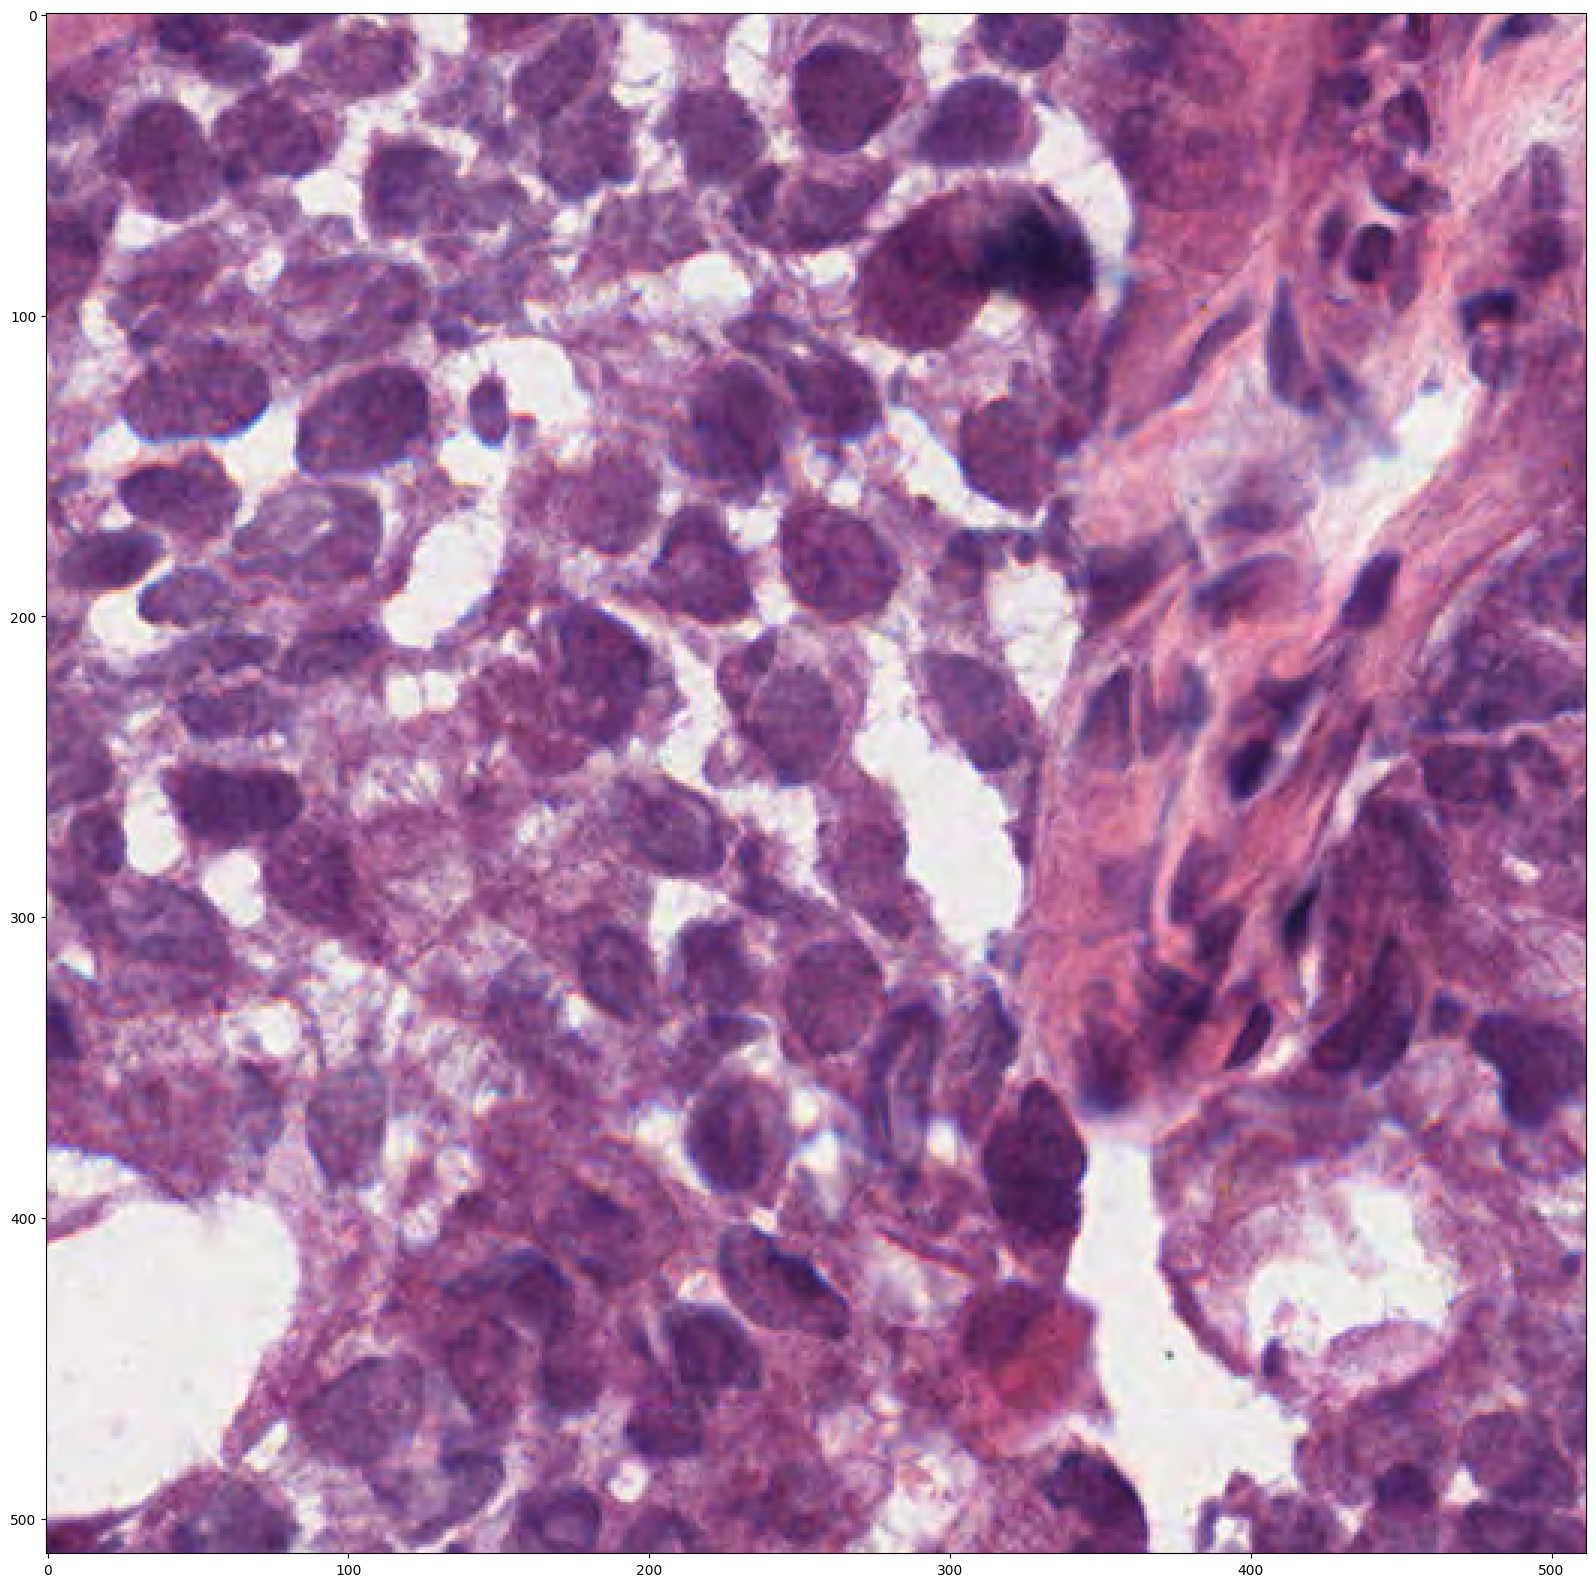

In [19]:
#read_region 메소드로 이미지의 특정 영역을 읽어옴
#reigion : 읽어올 영역의 시작좌표(top-left x, top-left y)
region_coords = (30000, 30000)
#level 읽어올 영역 크게(넓이, 높이)
level = 0
#size 읽어올 영역 크기(넓이, 높이)
size = (512, 512)
region_image = slide.read_region(region_coords, level, size)
plt.figure(figsize=(20,20))
plt.imshow(region_image)
plt.show()